In [3]:
import pandas as pd

data = pd.read_csv('imdb_top_1000.csv')
data.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [5]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [4]:
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)
data['Gross'].fillna('unknow', inplace=True)
data['Certificate'].fillna('unknow', inplace=True)

In [8]:
data.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

The most popular of anything can be known by counting the number of occurrences.
In this case, I grouped the occurrences of each genre with the genre itself and then sorted the dataframe.
Choosed this way so that it can be used in 4 and 5


In [8]:
genre_counts = data.groupby('Genre').size().reset_index(name='Count')
genre_counts.sort_values(by='Count', ascending=False, inplace=True)

print(genre_counts.Genre.iloc[0], 'is the most common genre with a count of', genre_counts.Count.iloc[0])


Drama is the most common genre with a count of 85


4- just call genre_counts

In [11]:
genre_counts

,Genre,Count
137,Drama,85
172,"Drama, Romance",37
100,"Comedy, Drama",35
105,"Comedy, Drama, Romance",31
22,"Action, Crime, Drama",30
...,...,...
23,"Action, Crime, Mystery",1
131,"Crime, Drama, Sci-Fi",1
76,"Animation, Crime, Mystery",1
79,"Animation, Drama, Romance",1


I Choosed to visualize the first 14 of Most Popular Genres as the rest are not as popular.

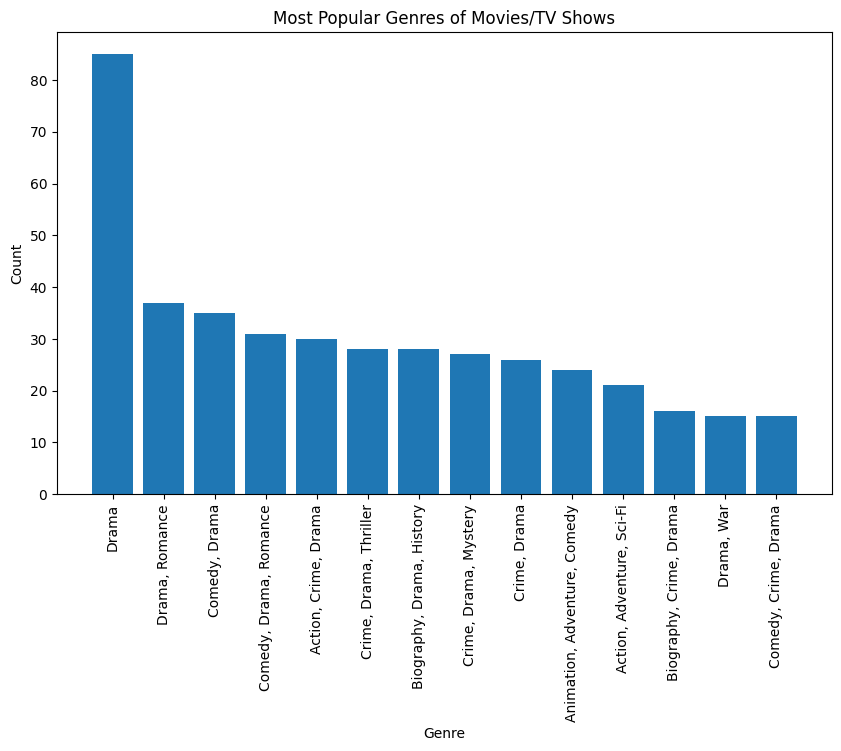

In [55]:
import matplotlib.pyplot as plt

plt_data = genre_counts[0:14]

plt.figure(figsize=(10, 6))
plt.bar(plt_data['Genre'], plt_data['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Popular Genres of Movies/TV Shows')
plt.xticks(rotation=90)
plt.show()

## combin all Genre under 14 togther


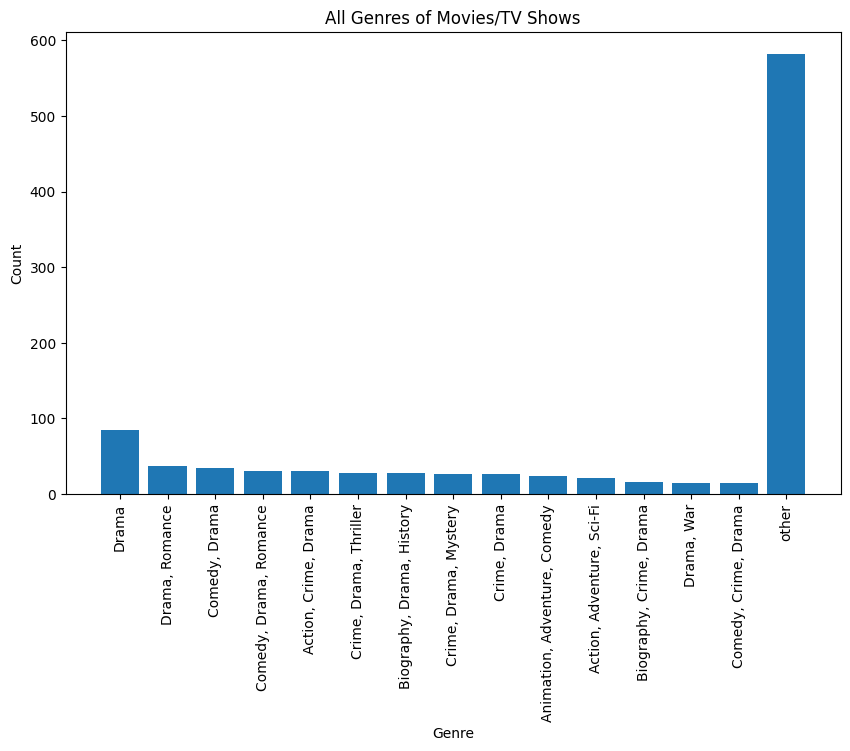

In [56]:
import matplotlib.pyplot as plt

other =pd.DataFrame({'Genre':'other','Count':genre_counts[14:].Count.sum()}, index=['1'])
plt_data = pd.concat([genre_counts[0:14], other])  

plt.figure(figsize=(10, 6))
plt.bar(plt_data['Genre'], plt_data['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('All Genres of Movies/TV Shows')
plt.xticks(rotation=90)
plt.show()

In [73]:
### director with the most top-rated movies/TV 
director = data.groupby('Director').IMDB_Rating.size().reset_index(name='Count').sort_values(by='Count', ascending=False)
director

,Director,Count
22,Alfred Hitchcock,14
470,Steven Spielberg,13
179,Hayao Miyazaki,11
313,Martin Scorsese,10
9,Akira Kurosawa,10
...,...,...
225,Jessie Nelson,1
224,Jeong-beom Lee,1
223,Jemaine Clement,1
222,Jeethu Joseph,1


Retreiving the most top-rated director by finding the max rate count of director list 
 

In [81]:
top_director = director.loc[director['Count'].idxmax(), 'Director']
top_director

'Alfred Hitchcock'

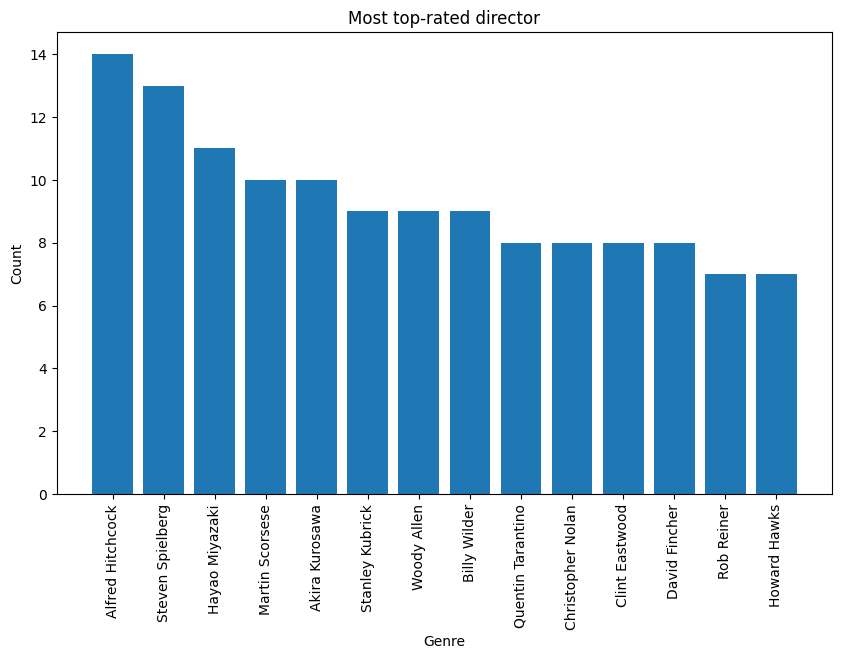

In [89]:
plt_data = director[0:14]

plt.figure(figsize=(10, 6))
plt.bar(plt_data['Director'], plt_data['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most top-rated director')
plt.xticks(rotation=90)
plt.show()